<a href="https://colab.research.google.com/github/viveksangani/C2P_Public/blob/main/examples/example_landslide4sense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Landslide4Sense Example

In [1]:
!pip install terratorch==0.99.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python-headless to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.6/317.6 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.0/211.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.0/849.0 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [1]:
import os
import sys
import numpy as np
import torch

import terratorch
from terratorch.datamodules import Landslide4SenseNonGeoDataModule
from terratorch.datasets import Landslide4SenseNonGeo
from terratorch.tasks import SemanticSegmentationTask

import albumentations

import lightning.pytorch as pl
from lightning.pytorch.loggers import TensorBoardLogger
from lightning.pytorch.callbacks import ModelCheckpoint

Dataset Download

In [23]:
!pip -q install -U huggingface_hub

from huggingface_hub import login
login()  # <- paste your Personal Access Token (scopes: "read")


In [24]:
from huggingface_hub import snapshot_download
from pathlib import Path

DATASET_PATH = Path("./data")
DATASET_PATH.mkdir(parents=True, exist_ok=True)

_ = snapshot_download(
    repo_id="ibm-nasa-geospatial/Landslide4sense",
    repo_type="dataset",
    cache_dir="./cache",
    local_dir=str(DATASET_PATH),
    local_dir_use_symlinks=False,
    resume_download=True
)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:982: UserWarning: `local_dir_use_symlinks` parameter is deprecated and will be ignored. The process to download files to a local folder has been updated and do not rely on symlinks anymore. You only need to pass a destination folder as`local_dir`.
For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/download#download-files-to-local-folder.
  warnings.warn(


Fetching 9695 files:   0%|          | 0/9695 [00:00<?, ?it/s]

images/validation/image_58.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_57.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_56.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_6.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_61.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_59.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_60.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_62.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_63.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_66.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_65.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_64.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_67.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_69.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_7.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_68.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_70.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_71.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_73.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_75.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_72.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_74.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_76.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_78.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_77.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_79.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_8.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_80.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_81.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_82.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_83.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_84.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_85.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_86.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_87.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_88.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_89.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_9.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_90.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_93.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_91.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_95.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_94.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_92.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_96.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_99.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_98.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

images/validation/image_97.h5:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

If you have the data already downloaded, update the `DATASET_PATH`. Otherwise, download it with the following code.
Check [here](https://huggingface.co/datasets/ibm-nasa-geospatial/Landslide4sense) for more details on this dataset.

In [25]:
DATASET_PATH = "/content/data"

In [26]:
from huggingface_hub import snapshot_download

repo_id = "ibm-nasa-geospatial/Landslide4sense"
_ = snapshot_download(repo_id=repo_id, repo_type="dataset", cache_dir="./cache", local_dir=DATASET_PATH)

Fetching 9695 files:   0%|          | 0/9695 [00:00<?, ?it/s]

In [27]:
OUT_DIR = "./landslide_example"  # where to save checkpoints and log files

BATCH_SIZE = 16
EPOCHS = 40
LR = 1.0e-4
WEIGHT_DECAY = 0.1
HEAD_DROPOUT=0.1
FREEZE_BACKBONE = False

BANDS = ["BLUE", "GREEN", "RED", "NIR_BROAD", "SWIR_1", "SWIR_2"]
NUM_WORKERS = 7   # adjust value based on your system

SEED = 0

#### Exploring the dataset

In [28]:
data_module = Landslide4SenseNonGeoDataModule(
    data_root=DATASET_PATH,
)

In [29]:
# Checking the dataset means and stds
print(data_module.means)
print(data_module.stds)

[-0.4914, -0.3074, -0.1277, -0.0625, 0.0439, 0.0803, 0.0644, 0.0802, 0.3, 0.4082, 0.0823, 0.0516, 0.3338, 0.7819]
[0.9325, 0.8775, 0.886, 0.8869, 0.8857, 0.8418, 0.8354, 0.8491, 0.9061, 1.6072, 0.8848, 0.9232, 0.9018, 1.2913]


In [30]:
# Checking train split size
data_module.setup("fit")
train_dataset = data_module.train_dataset
len(train_dataset)

3799

In [31]:
# Checking available bands
train_dataset.all_band_names

('COASTAL AEROSOL',
 'BLUE',
 'GREEN',
 'RED',
 'RED_EDGE_1',
 'RED_EDGE_2',
 'RED_EDGE_3',
 'NIR_BROAD',
 'WATER_VAPOR',
 'CIRRUS',
 'SWIR_1',
 'SWIR_2',
 'SLOPE',
 'DEM')

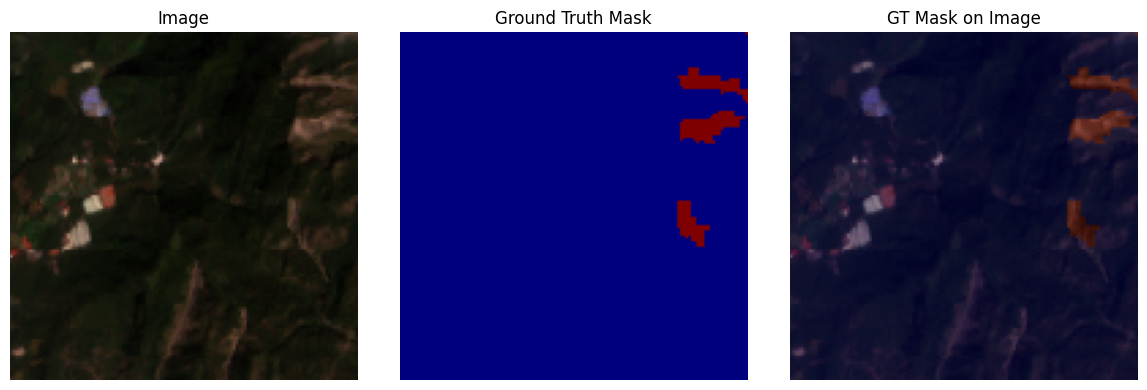

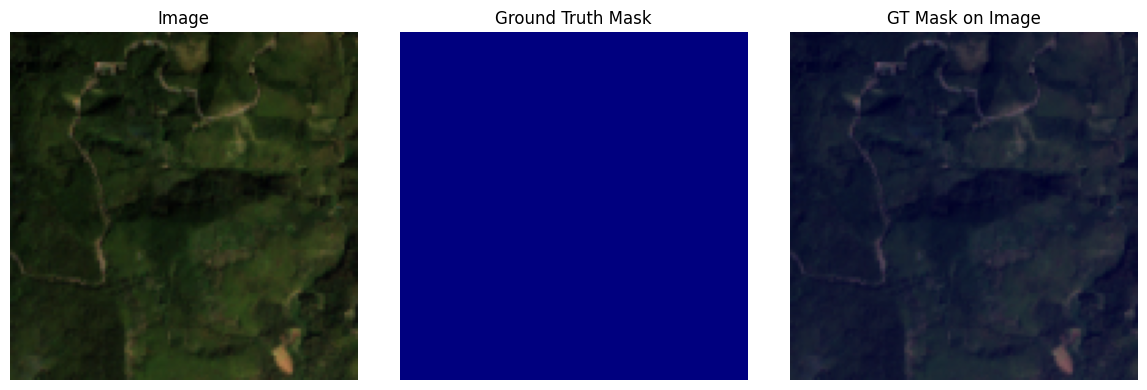

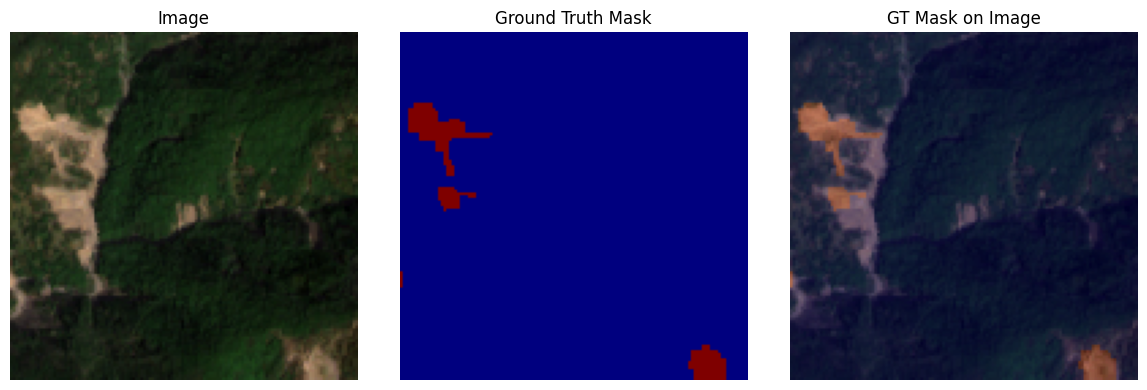

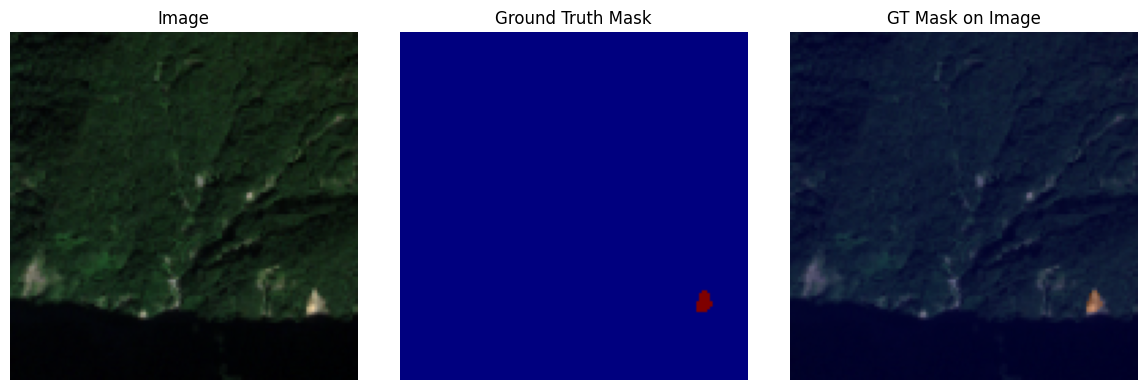

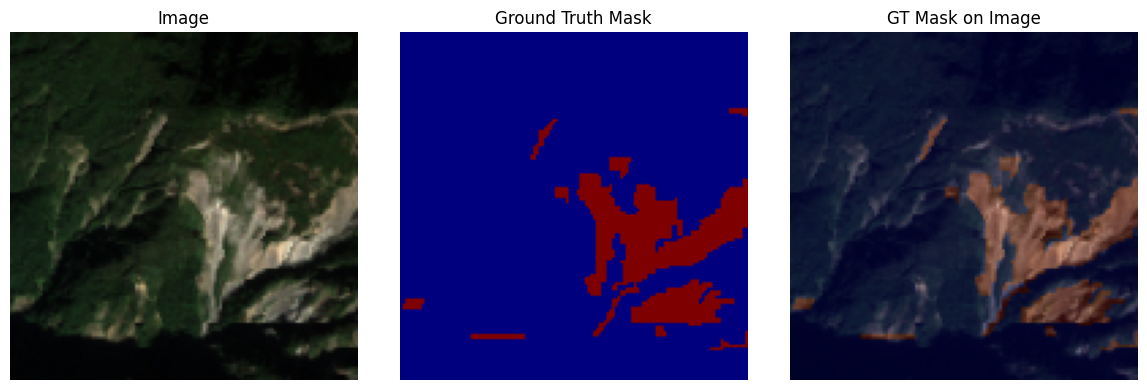

In [32]:
# Ploting a few samples
for i in range(5):
    train_dataset.plot(train_dataset[i])

In [33]:
# Checking validation split size
val_dataset = data_module.val_dataset
len(val_dataset)

245

In [34]:
# Checking test split
data_module.setup("test")
test_dataset = data_module.test_dataset
len(test_dataset)

800

#### Training setup

In [35]:
pl.seed_everything(SEED)

# Logger
logger = TensorBoardLogger(
    save_dir=OUT_DIR,
    name="landslide_example",
)

# Callbacks
checkpoint_callback = ModelCheckpoint(
    monitor="val/Multiclass_Jaccard_Index",
    mode="max",
    dirpath=os.path.join(OUT_DIR, "landslide_example", "checkpoints"),
    filename="best-checkpoint-{epoch:02d}-{val_loss:.2f}",
    save_top_k=1,
)

# Trainer
trainer = pl.Trainer(
    accelerator="auto",
    strategy="auto",
    devices="auto",
    precision="bf16-mixed",
    num_nodes=1,
    logger=logger,
    max_epochs=EPOCHS,
    check_val_every_n_epoch=1,
    log_every_n_steps=10,
    enable_checkpointing=True,
    callbacks=[checkpoint_callback],
)

INFO: Seed set to 0
INFO:lightning.fabric.utilities.seed:Seed set to 0
INFO: Using bfloat16 Automatic Mixed Precision (AMP)
INFO:lightning.pytorch.utilities.rank_zero:Using bfloat16 Automatic Mixed Precision (AMP)
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [36]:
# DataModule

transforms = [
    albumentations.Resize(224, 224),
    albumentations.pytorch.transforms.ToTensorV2(),
]

# Adding augmentations for training
train_transforms = [
    albumentations.HorizontalFlip(),
    albumentations.Resize(224, 224),
    albumentations.pytorch.transforms.ToTensorV2(),
]

data_module = Landslide4SenseNonGeoDataModule(
    batch_size=BATCH_SIZE,
    bands=BANDS,
    data_root=DATASET_PATH,
    train_transform=train_transforms,
    val_transforms=transforms,
    test_transforms=transforms,
    num_workers=NUM_WORKERS,
)

In [37]:
# Model

backbone_args = dict(
    backbone_pretrained=True,
    backbone="prithvi_eo_v2_300", # prithvi_eo_v2_300, prithvi_eo_v2_300_tl, prithvi_eo_v2_600, prithvi_eo_v2_600_tl
    backbone_bands=BANDS,
    backbone_num_frames=1,
)

decoder_args = dict(
    decoder="UperNetDecoder",
    decoder_channels=256,
    decoder_scale_modules=True,
)

necks = [
    dict(
            name="SelectIndices",
            # indices=[2, 5, 8, 11]    # indices for prithvi_eo_v1_100
            indices=[5, 11, 17, 23],   # indices for prithvi_eo_v2_300
            # indices=[7, 15, 23, 31]  # indices for prithvi_eo_v2_600
        ),
    dict(
            name="ReshapeTokensToImage",
        )
    ]

model_args = dict(
    **backbone_args,
    **decoder_args,
    num_classes=2,
    head_dropout=HEAD_DROPOUT,
    head_channel_list=[128, 64],
    necks=necks,
    rescale=True,
)


model = SemanticSegmentationTask(
    model_args=model_args,
    plot_on_val=False,
    loss="focal",
    lr=LR,
    optimizer="AdamW",
    scheduler="StepLR",
    scheduler_hparams={"step_size": 10, "gamma": 0.9},
    optimizer_hparams=dict(weight_decay=WEIGHT_DECAY),
    ignore_index=-1,
    freeze_backbone=FREEZE_BACKBONE,
    freeze_decoder=False,
    model_factory="EncoderDecoderFactory",
)

config.json:   0%|          | 0.00/753 [00:00<?, ?B/s]

Prithvi_EO_V2_300M.pt:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/terratorch/models/decoders/upernet_decoder.py:37: UserWarning: DeprecationWarning: scale_modules is deprecated and will be removed in future versions. Use LearnedInterpolateToPyramidal neck instead.
  warnings.warn(


#### Training and testing the model

In [ ]:
# Training
trainer.fit(model, datamodule=data_module)

In [ ]:
ckpt_path = checkpoint_callback.best_model_path

# Test results
test_results = trainer.test(model, datamodule=data_module, ckpt_path=ckpt_path)

In [ ]:
test_results

[{'test/loss': 3.0330820663948543e-06,
  'test/Multiclass_Accuracy': 0.9844433665275574,
  'test/multiclassaccuracy_0': 0.9961121678352356,
  'test/multiclassaccuracy_1': 0.3782273828983307,
  'test/Multiclass_F1_Score': 0.9844433665275574,
  'test/Multiclass_Jaccard_Index': 0.6495010256767273,
  'test/multiclassjaccardindex_0': 0.9843314290046692,
  'test/multiclassjaccardindex_1': 0.314670592546463,
  'test/Multiclass_Jaccard_Index_Micro': 0.9693633317947388}]